# Raw analytics - Social media User Analysis

Análise dos dados brutos da camada bronze

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extração dos dados

In [2]:
df_raw = pd.read_csv('dados_brutos.csv')

# 1. Verificações de inconsistências nos dados.

## 1.1 Verificação de linhas duplicadas
Foi aplicada a função duplicade().sum() para que se houver alguma linha duplicada ela seja somada e se caso não haja linhas duplicadas retornar uma mensagem confirmando a informação.

In [ ]:
duplicada = df_raw.duplicated().sum()
if duplicada > 0:
    print(f'Existem {duplicada} linhas duplicadas. ')
else:
    print('Não existem linhas duplicadas. ')

Não existem linhas duplicadas. 


## 1.1.1 Grafico verificando a não existencia de duplicadas

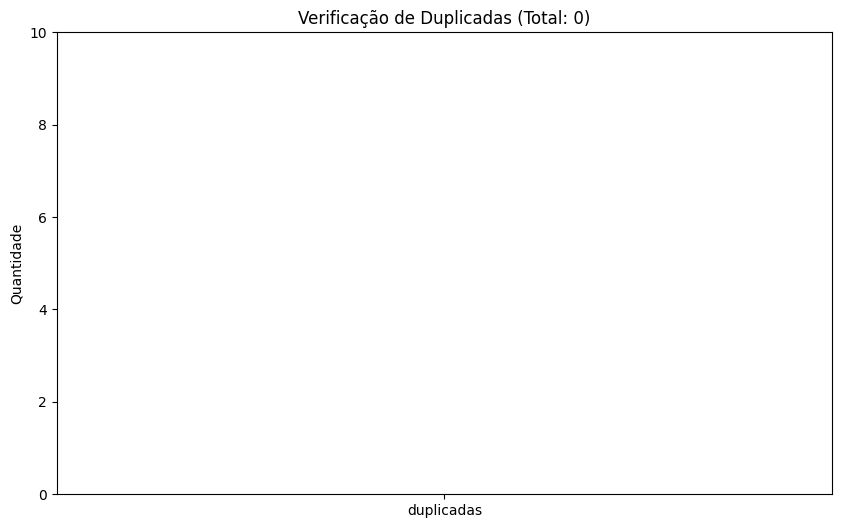

In [ ]:
df_duplicada = df_raw[df_raw.duplicated(keep=False)]
total_duplicadas = len(df_duplicada)
plt.figure(figsize=(10, 6))
plt.bar(['duplicadas'],[total_duplicadas], color='skyblue')
plt.title(f'Verificação de Duplicadas (Total: {total_duplicadas})')
plt.ylabel('Quantidade')
plt.ylim(0,10)
plt.show()


## 1.2 Verificação de valores escritos de formas diferentes nas colunas de texto

In [ ]:
df_strings = df_raw.select_dtypes(include=['object', 'string'])
df_strings = df_strings.drop(columns=['last_login_date'], errors='ignore')

for coluna in df_strings.columns:
    print(f'A coluna {coluna} possui os valores unicos:')
    print(df_raw[coluna].unique())
    print("-----")


A coluna app_name possui os valores unicos:
['Instagram']
-----
A coluna gender possui os valores unicos:
['Female' 'Non-binary' 'Male' 'Prefer not to say']
-----
A coluna country possui os valores unicos:
['India' 'United Kingdom' 'Canada' 'South Korea' 'United States' 'Japan'
 'Australia' 'Brazil' 'Other' 'Germany']
-----
A coluna urban_rural possui os valores unicos:
['Rural' 'Urban' 'Suburban']
-----
A coluna income_level possui os valores unicos:
['High' 'Middle' 'Upper-middle' 'Lower-middle' 'Low']
-----
A coluna employment_status possui os valores unicos:
['Retired' 'Full-time employed' 'Student' 'Unemployed' 'Freelancer'
 'Part-time']
-----
A coluna education_level possui os valores unicos:
['Bachelor’s' 'Other' 'Master’s' 'High school' 'Some college' 'PhD']
-----
A coluna relationship_status possui os valores unicos:
['Single' 'Divorced' 'In a relationship' 'Married' 'Widowed']
-----
A coluna has_children possui os valores unicos:
['No' 'Yes']
-----
A coluna diet_quality possu

## 1.3 Dados faltando ou vazios 

In [ ]:
missing_values = pd.DataFrame({
    'Coluna': df_raw.columns,
    'nulos': df_raw.isnull().sum(),
    'vazios': (df_raw == '').sum(),
    'Total': df_raw.isnull().sum() + (df_raw == '').sum(),
    'percentual': (df_raw.isnull().sum() + (df_raw == '').sum()) / len(df_raw) * 100
})
if missing_values['Total'] .sum() == 0:
    print("Não foram encontrados valores ausentes.")
else:
    missing_values = missing_values.sort_values(by='percentual', ascending=False)
    missing_values
    display(missing_values[missing_values['total'] > 0])

Não foram encontrados valores ausentes.


## 1.3.1 Grafico de verificação de valores ausentes

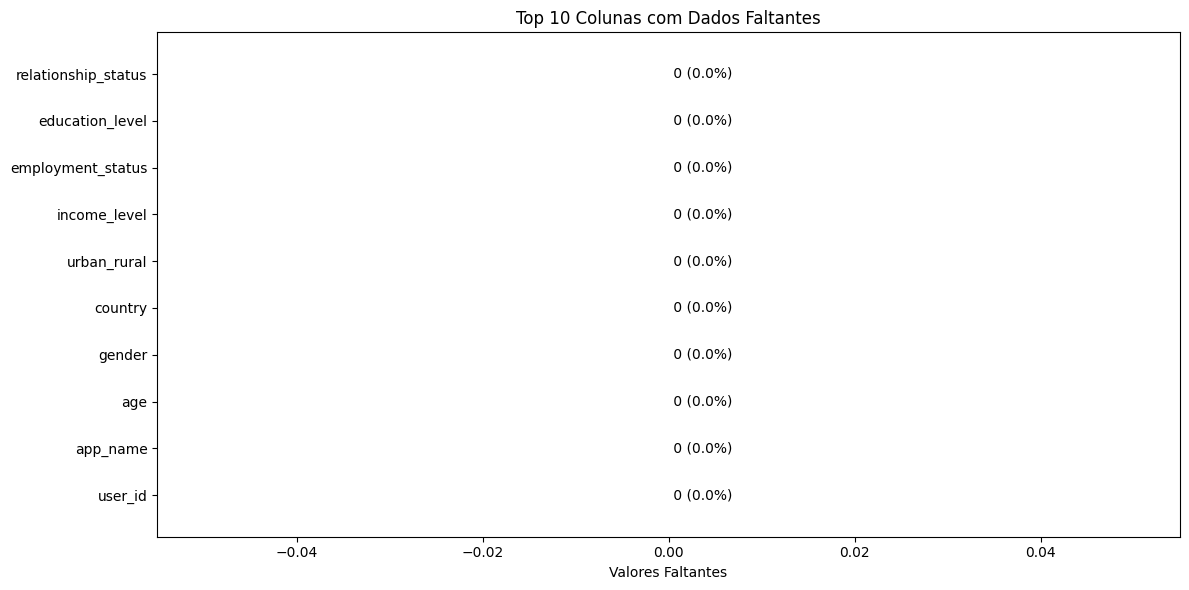

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))
top_missing = missing_values.head(10)
colors = sns.color_palette('rocket', n_colors=len(top_missing))
    
ax.barh(top_missing['Coluna'], top_missing['Total'], color=colors)
ax.set_xlabel('Valores Faltantes')
ax.set_title('Top 10 Colunas com Dados Faltantes')
    
for i, (idx, row) in enumerate(top_missing.iterrows()):
    ax.text(row['Total'], i, f" {row['Total']:,.0f} ({row['percentual']:.1f}%)", ha='left', va='center')
    
plt.tight_layout()
plt.show()


## 1.4 Verificação de outliers

Para a detecção e visualização de possiveis outliers foram usados gráficos boxplot e um algoritmo de detecção logo abaixo utilizando a técnica IQR 

In [3]:
outliers = {}

for coluna in df_raw.select_dtypes(include=["float64","int64"]).columns:
    Q1 = df_raw[coluna].quantile(0.25)
    Q3 = df_raw[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_coluna = df_raw[(df_raw[coluna] < limite_inferior) | (df_raw[coluna] > limite_superior)]
    total_out = len(outliers_coluna)

    if total_out > 0:
        menor_valor = outliers_coluna[coluna].min()
        maior_valor = outliers_coluna[coluna].max()
    else:
        menor_valor = None
        maior_valor = None

    outliers[coluna] ={
        "contagem de outliers": total_out,
        "% de outliers": (total_out / len(df_raw)) * 100,
        "menor valor": menor_valor,
        "maior valor": maior_valor,
    }

outliers_df = pd.DataFrame.from_dict(outliers, orient='index')
outliers_total = outliers_df['contagem de outliers'] > 0
outliers_df[outliers_total]



,contagem de outliers,% de outliers,menor valor,maior valor
exercise_hours_per_week,10387,0.671040,18.30,24.10
sleep_hours_per_night,14835,0.958398,3.00,10.00
body_mass_index,5071,0.327606,35.90,45.00
daily_steps_count,11066,0.714906,7566.00,8473.00
weekly_work_hours,10177,0.657473,0.00,80.00
hobbies_count,18403,1.188904,8.00,10.00
social_events_per_month,33207,2.145299,9.00,15.00
books_read_per_year,11711,0.756575,0.00,29.00
volunteer_hours_per_month,23567,1.522518,10.40,17.60
travel_frequency_per_year,18526,1.196850,8.00,15.00


Ao analisar os resultados do algoritmo foi projetado um boxplot de algumas colunas para ter uma visulização dos outliers

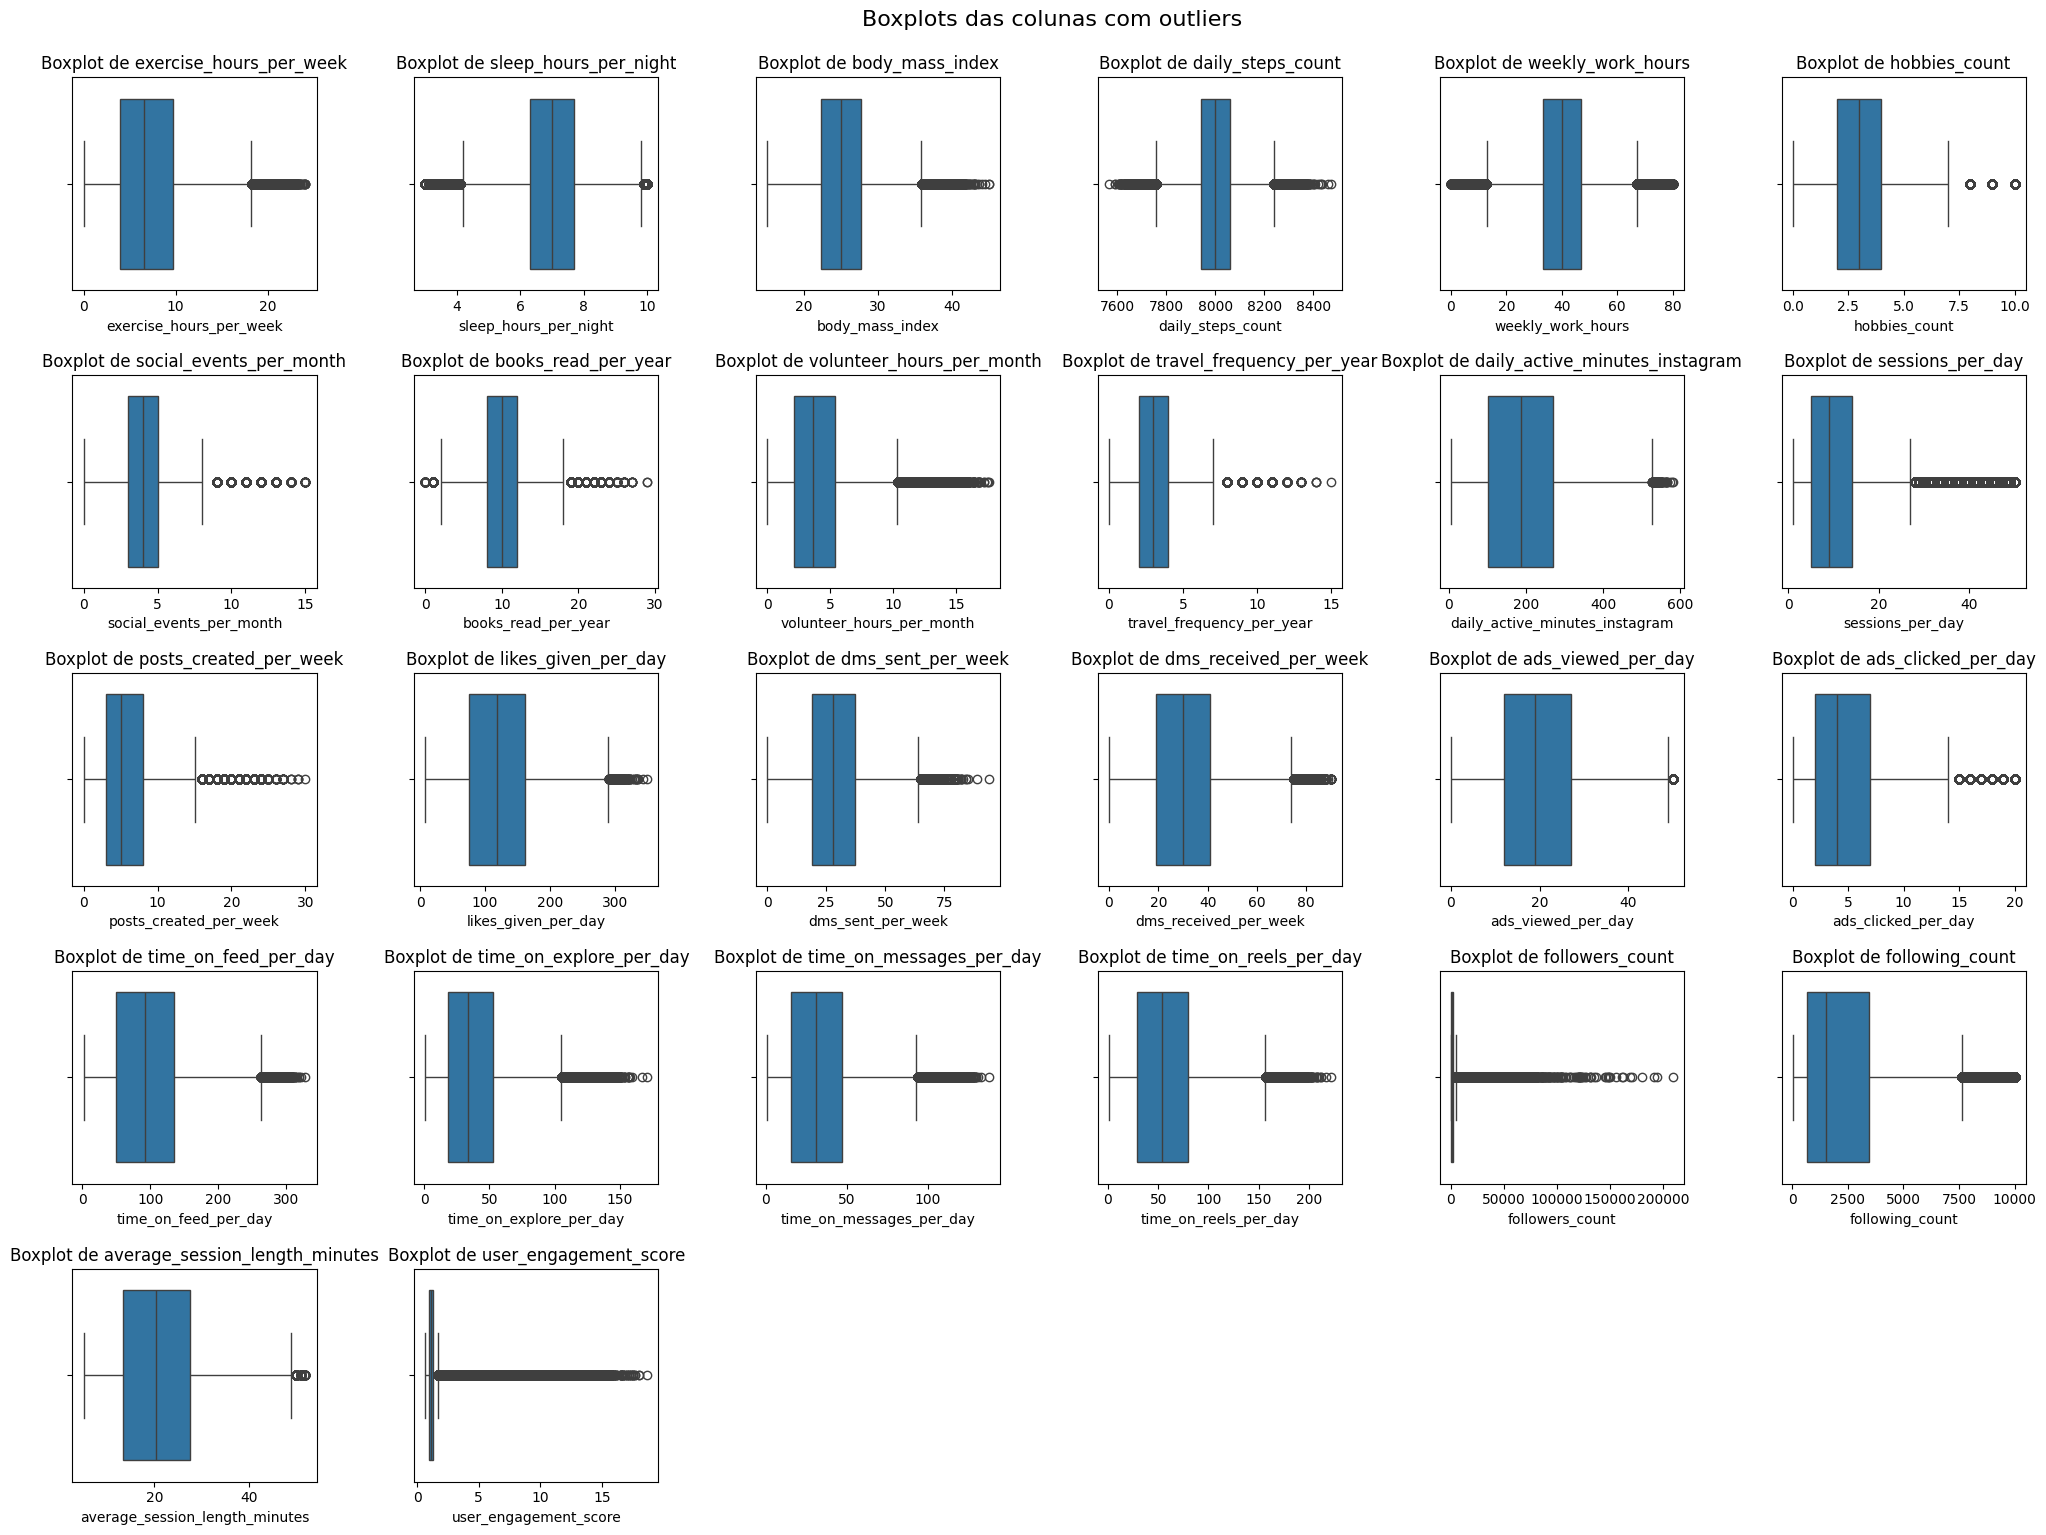

In [ ]:
fig = plt.figure(figsize=(20,15))
grid = fig.add_gridspec(5,6)
eixo_X = 0
eixo_y = 0


for col in outliers_df[outliers_total].index:
        ax = fig.add_subplot(grid[eixo_y, eixo_X])
        sns.boxplot(x=df_raw[col], ax=ax)
        ax.set_title(f'Boxplot de {col}')
        eixo_X += 1
        if eixo_X >5 :
            eixo_X = 0
            eixo_y += 1
            if eixo_y >4:
                break
plt.tight_layout()
fig.suptitle('Boxplots das colunas com outliers',fontsize=16, y=1.02,x=0.5 )
plt.subplots_adjust(hspace=0.4, wspace=0.4) 
        


Apesar dos graficos apresentados acima apresentarem outliers é preciso analisar individualmente cada grafico para concluir se os valores alem do permitido pela regra do IQR podem ser considerados outliers de acordo com a regra de negocio pois, apesar de muito altos ou muito baixos, os valores podem ainda dentro da realidade esperada.

Sera feita a análise apenas das colunas que são uteís para a regra de negocio do projeto, logo, as colunas que dizem a respeito de hoobies de usuários, viagens feitas, ou sua atividade online,com exceção das que dizema  respeito de suas preferencias não seram analizadas separadamente.

## analisando os outliers da tabela de exercicio fisico

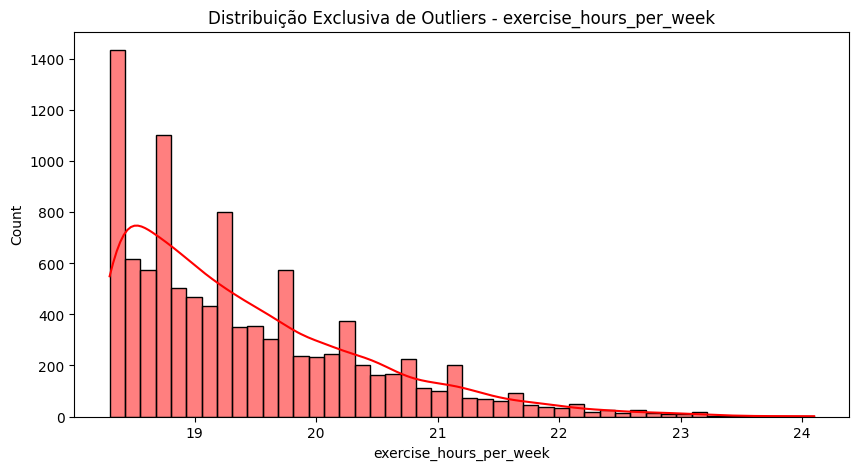

In [ ]:
Q1 = df_raw["exercise_hours_per_week"].quantile(0.25)
Q3 = df_raw["exercise_hours_per_week"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["exercise_hours_per_week"] < limite_inferior) | (df_raw["exercise_hours_per_week"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers[coluna], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {coluna}')
plt.show()

Ao analisar o boxplot junto com a tabela de relatorio e o histograma de outliers, é possivel percerber que o maior valor encontrado considerado outlier é de 24 horas de exercício fisico por semana, oque da 3 horas de exercício por dia , oque por mais que seja muito, não pode ser considereado como um outlier pois é um numero possivel de ser alcançado. portanto, pode-se considerar a tabela como uma tabela sem outliers.

## analisando os outliers da coluna de horas de sono por dia

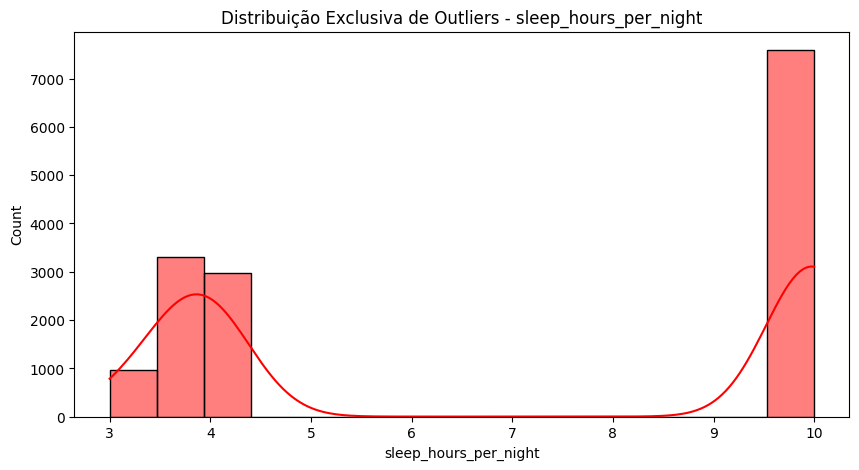

In [10]:
Q1 = df_raw["sleep_hours_per_night"].quantile(0.25)
Q3 = df_raw["sleep_hours_per_night"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["sleep_hours_per_night"] < limite_inferior) | (df_raw["sleep_hours_per_night"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["sleep_hours_per_night"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"sleep_hours_per_night"}')
plt.show()

Ao analisar o boxplot junto com a tabela de relatorio, é possivel percerber que o maior valor encontrado considerado outlier é de 10 horas de sono por dia e o menor é 3 horas por dia, é possivel aceitar os outliers do limite maior pois ainda é um numero realista de horas de sono equanto os numeros menores são muito absurdos, indicando um possivel erro na coleta.

## analisando os outliers da coluna de IMC (mass body index/indice de massa corporal)

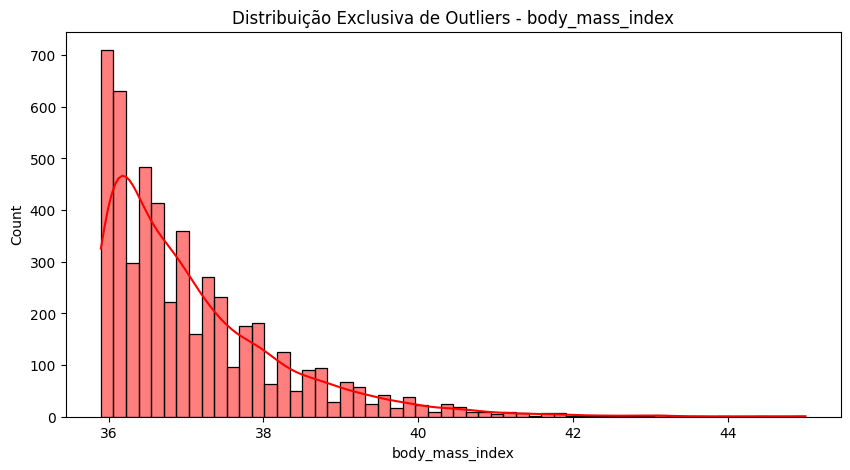

In [11]:
Q1 = df_raw["body_mass_index"].quantile(0.25)
Q3 = df_raw["body_mass_index"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["body_mass_index"] < limite_inferior) | (df_raw["body_mass_index"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["body_mass_index"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"body_mass_index"}')
plt.show()

De acordo com OMS, IMC acima de 40 são considerados obsidade morbida, oque para a regra de negocio que busca vender anuncios de academia e itens relacionados a exercicio fisico pode não ser uma boa escolhe manter estes dados, mas considerando que tambem temos o objetivo de divulgar planos de saúde ao melhor publico, é plausivel manter esses dados.

## anlisando os outliers da coluna de passos dados por dias

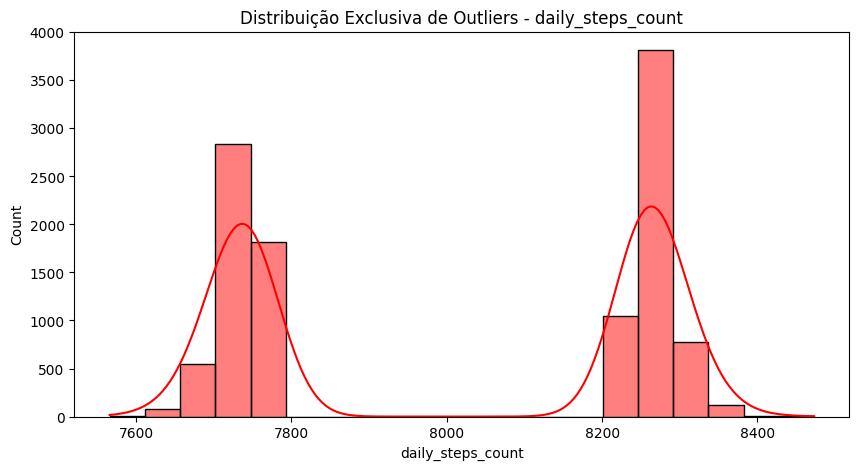

In [12]:
Q1 = df_raw["daily_steps_count"].quantile(0.25)
Q3 = df_raw["daily_steps_count"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["daily_steps_count"] < limite_inferior) | (df_raw["daily_steps_count"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["daily_steps_count"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"daily_steps_count"}')
plt.show()

Ao analisar os 3 graficos a respeito da tabela em questão é possivel percerber que por mais que sejam considerados outliers pela formula matematica, não há um consenso sobre o numero medio de passos dados por seres humanos por dia, mas estima-se que a media é entre 4 mil a 8 mil passos por dia, levando essa informação em consideração pode-se desconsiderar esses valores como outliers

## Analise da coluna de horas semanais de trabalho

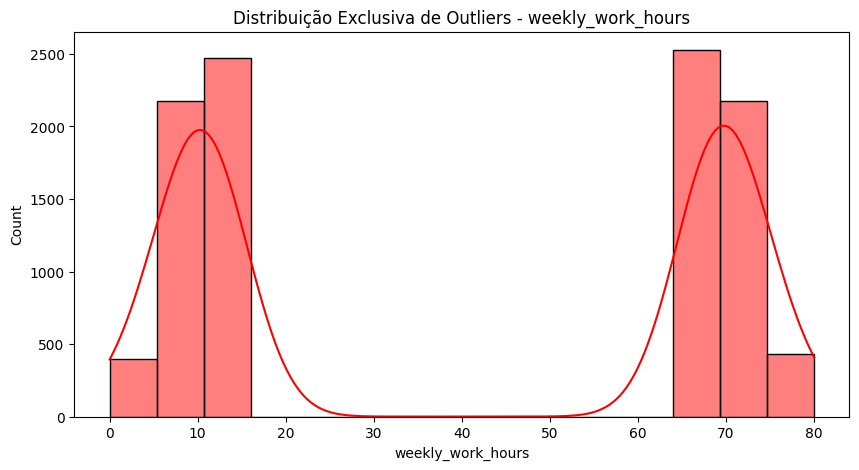

In [13]:
Q1 = df_raw["weekly_work_hours"].quantile(0.25)
Q3 = df_raw["weekly_work_hours"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["weekly_work_hours"] < limite_inferior) | (df_raw["weekly_work_hours"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["weekly_work_hours"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"weekly_work_hours"}')
plt.show()

Observando o histograma, fica claro que devemos cortar as pessoas com as horas de trabalho menores que 15, pois considerando que os usuarios nessa faixa de trabalho, trabalhem nos 5 dias da semana, da 3 horas de diário oque pode-se considerar que o usuário provavelmente trabalha em um emprego de meio período ou um estagio remunerado oque pode significar que ele não tera uma boa condição financeira para poder se tornar um possivel cliente dos anuncios que possam ser mostrados a ele, por isso eles devem ser retirados.

## analisando a coluna de minutos diarios na rede social

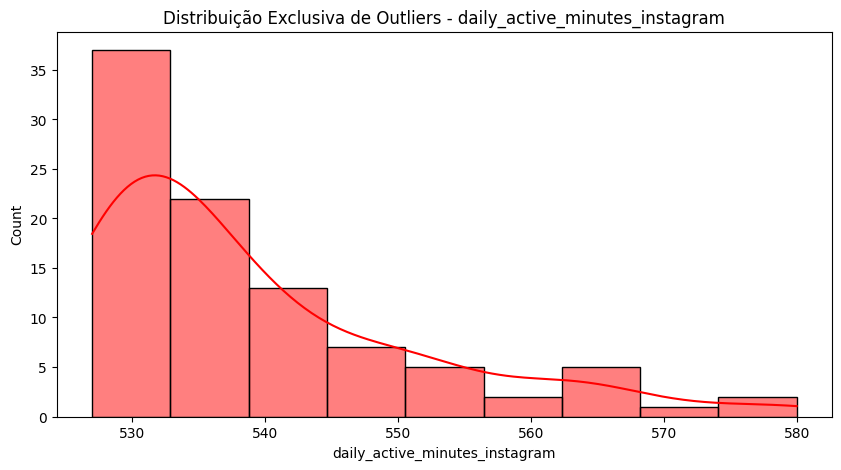

526.0


In [ ]:
Q1 = df_raw["daily_active_minutes_instagram"].quantile(0.25)
Q3 = df_raw["daily_active_minutes_instagram"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["daily_active_minutes_instagram"] < limite_inferior) | (df_raw["daily_active_minutes_instagram"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["daily_active_minutes_instagram"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"daily_active_minutes_instagram"}')
plt.show()


Observando tanto o grafico de boxplot como o histograma dessa coluna, pode-se perceber que os outliers tem pouco desvio do valor maximo, considerado aceitavel pela formula IQN, e tam bem, são valores aceitaveis e realistas com oque estamos buscando, logo não podem ser considerados outliers.

## Analise dos outliers de quantidade de anuncios vistos por usuarios 

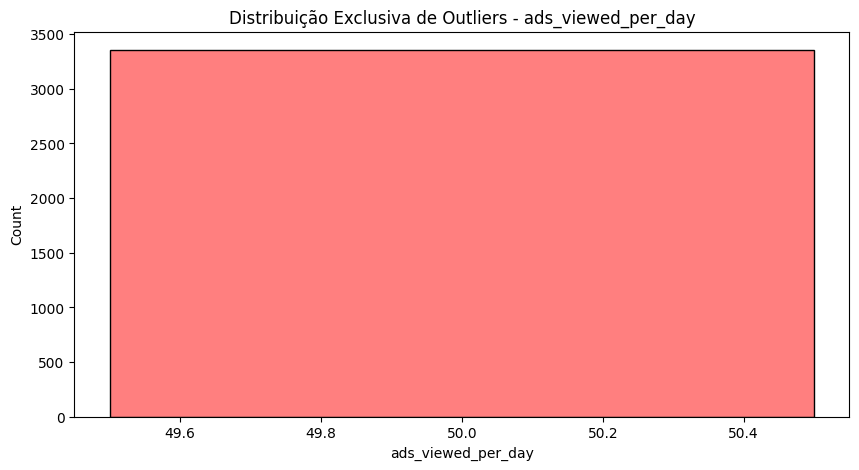

In [17]:
Q1 = df_raw["ads_viewed_per_day"].quantile(0.25)
Q3 = df_raw["ads_viewed_per_day"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["ads_viewed_per_day"] < limite_inferior) | (df_raw["ads_viewed_per_day"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["ads_viewed_per_day"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"ads_viewed_per_day"}')
plt.show()

Ao observar o grafico, é possivel perceber um estranho padrão de anuncios vistos na qual provavelmente foi um erro na coleta dos dados e deve ser removido

## Analise dos outliers de quantidade de anuncios clicados por usuarios

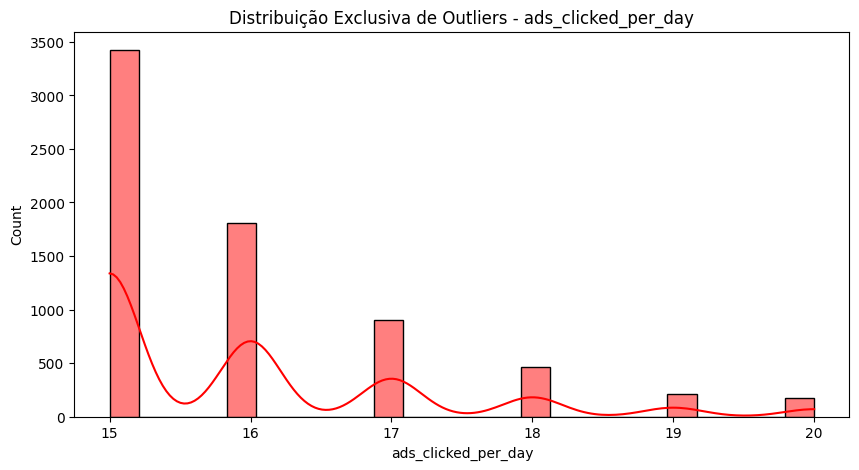

14.5


In [ ]:
Q1 = df_raw["ads_clicked_per_day"].quantile(0.25)
Q3 = df_raw["ads_clicked_per_day"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["ads_clicked_per_day"] < limite_inferior) | (df_raw["ads_clicked_per_day"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["ads_clicked_per_day"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"ads_clicked_per_day"}')
plt.show()

Ao observar o grafico é possivel percerber, por mais que eles não ultrapassem muito do limite maximo permitido pela formula (14.5), para uma melhor análise serão considerados outliers valores de 19 para cima.

## Analise dos outliers da coluna de tempo na aba feed

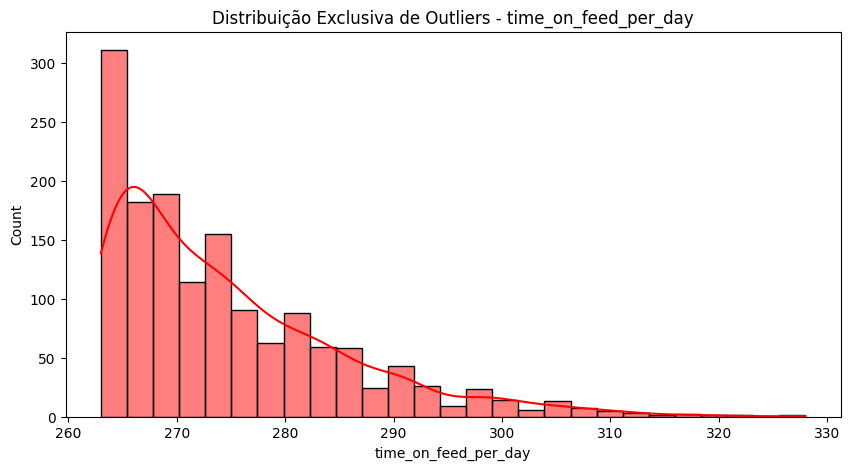

In [24]:
Q1 = df_raw["time_on_feed_per_day"].quantile(0.25)
Q3 = df_raw["time_on_feed_per_day"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["time_on_feed_per_day"] < limite_inferior) | (df_raw["time_on_feed_per_day"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["time_on_feed_per_day"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"time_on_feed_per_day"}')
plt.show()

Analisando os dados, e considerando que o valor maximo dado é cerca 5 horas por dia, oque é um valor bastante alto mas ainda realista em alguma realidades, como as dos mais jovens e mais velhos por exemplo que possuem um maior tempo livre para gastar com a rede social não podendo ser considerado um outlier.

## Analisando os outliers da tabela de tempo gasto na aba explorar

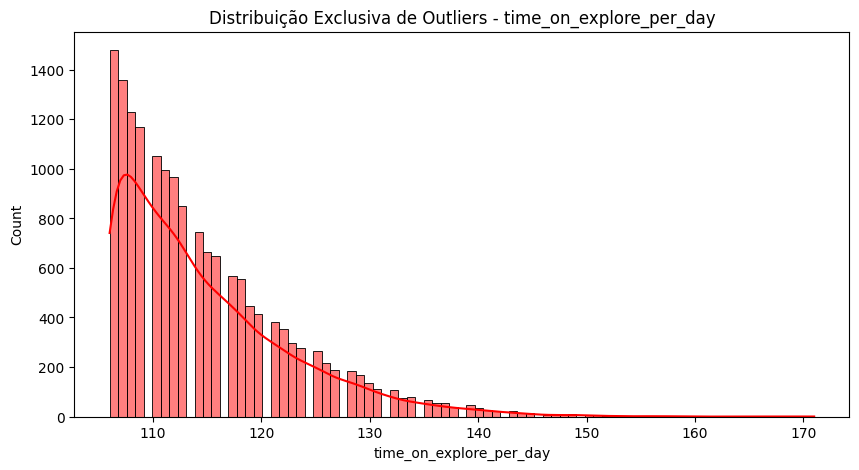

In [25]:
Q1 = df_raw["time_on_explore_per_day"].quantile(0.25)
Q3 = df_raw["time_on_explore_per_day"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["time_on_explore_per_day"] < limite_inferior) | (df_raw["time_on_explore_per_day"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["time_on_explore_per_day"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"time_on_explore_per_day"}')
plt.show()

observando o histograma e possivel concluir que os valores não podem ser considerados outliers pois são valores reais e possiveis e que não atrapalham o calculo da dos graficos devido a sua baixa quantidade e valores parecidos com os dentro do esperado.

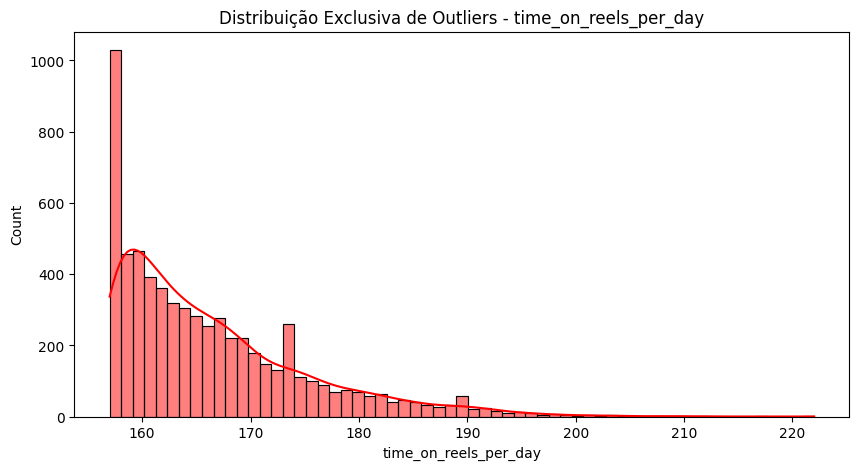

In [26]:
Q1 = df_raw["time_on_reels_per_day"].quantile(0.25)
Q3 = df_raw["time_on_reels_per_day"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_apenas_outliers = df_raw[(df_raw["time_on_reels_per_day"] < limite_inferior) | (df_raw["time_on_reels_per_day"] > limite_superior)]

plt.figure(figsize=(10, 5))
sns.histplot(df_apenas_outliers["time_on_reels_per_day"], kde=True, color='red')
plt.title(f'Distribuição Exclusiva de Outliers - {"time_on_reels_per_day"}')
plt.show()

observando o histograma e possivel concluir que os valores não podem ser considerados outliers pois são valores reais e possiveis e que não atrapalham o calculo da dos graficos devido a sua baixa quantidade e valores parecidos com os dentro do esperado.

#  Gráficos plotados a partir dos dados brutos

## 2. Assuntos relacionados a rede social

## 2.1 Distribuição de usuários entre os países da base de dados
Gráfico mostra a porcentagem de usuários de cada páis em toda base de dados.

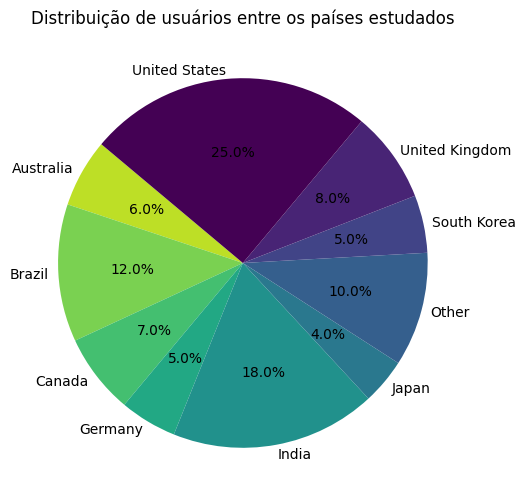

In [ ]:
paises_count = df_raw.groupby('country').country.count()
plt.figure(figsize=(10,6))
plt.pie(paises_count, autopct='%1.1f%%', startangle=140,labels= paises_count.index,colors = plt.cm.viridis(np.linspace(0.9, 0, 10)), labeldistance=1.05)
plt.title('Distribuição de usuários entre os países estudados')
plt.show()

## 2.2 Países que mais clicam em anúncios 

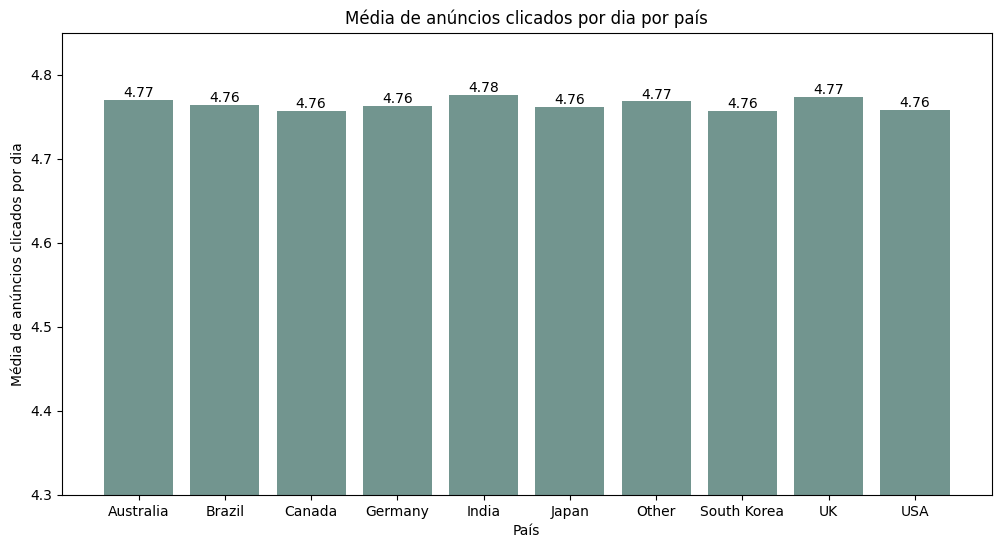

In [ ]:
plt.figure(figsize=(12,6))
df_raw['country'] = df_raw['country'].replace({'United Kingdom': 'UK', 'United States': 'USA'})
anum_c = df_raw.groupby('country')['ads_clicked_per_day'].mean()
resul = plt.bar(anum_c.index, anum_c.values, color="#376860", alpha=0.7)
for num in resul:
    height = num.get_height()
    plt.text(
        num.get_x() + num.get_width() / 2,
        height,
        f'{height:1.2f}',
        ha='center',
        va='bottom'
    )
plt.ylim(4.3,4.85)
plt.xlabel("País") 
plt.ylabel("Média de anúncios clicados por dia")
plt.title("Média de anúncios clicados por dia por país")
plt.show()

##  2.3 Faixa etária que mais clica em anúncios

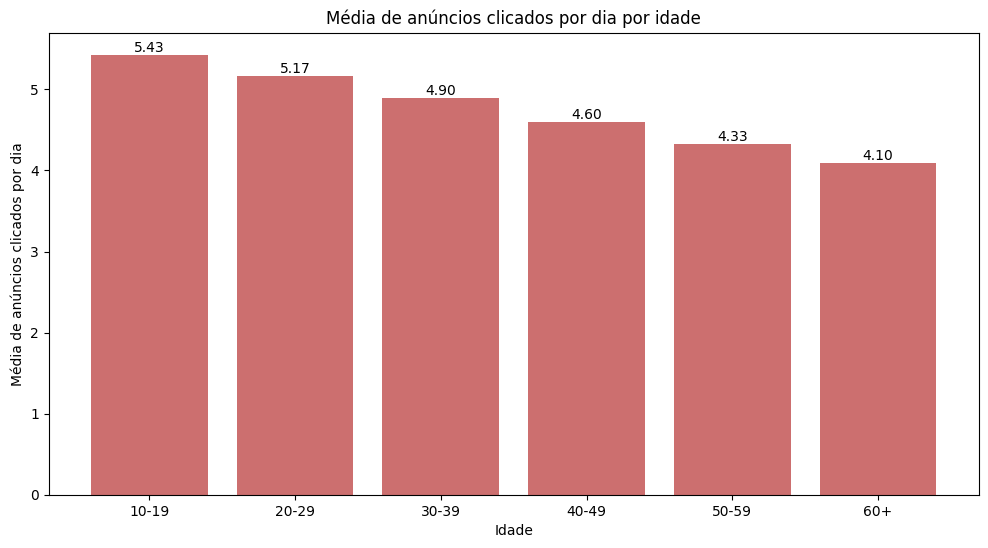

In [ ]:
plt.figure(figsize=(12,6))

bins= [10,20,30,40,50,60,70]
labels = ['10-19','20-29','30-39','40-49','50-59','60+']

df_raw['age_group'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)
anum_id = df_raw.groupby('age_group', observed=True)['ads_clicked_per_day'].mean()
resul = plt.bar(anum_id.index, anum_id.values, color="#B73232", alpha=0.7)
for num in resul:
    height = num.get_height()
    plt.text(
        num.get_x() + num.get_width() / 2,
        height,
        f'{height:1.2f}',
        ha='center',
        va='bottom'
    )
plt.xlabel("Idade") 
plt.ylabel("Média de anúncios clicados por dia")
plt.title("Média de anúncios clicados por dia por idade")
plt.show()

## 2.4 Analisando o tipo de conteúdo consumido por cada faixa étaria

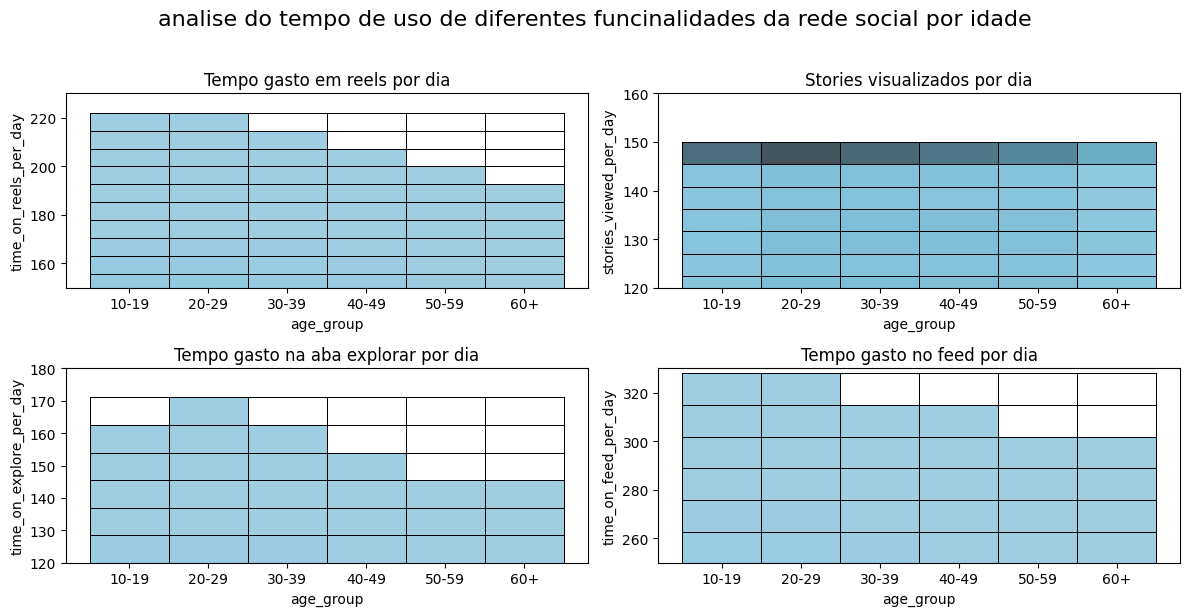

In [ ]:
fig = plt.figure(figsize=(12,6))
grid = fig.add_gridspec(2,2)

binsv= [10,20,30,40,50,60,70]
labels = ['10-19','20-29','30-39','40-49','50-59','60+']

df_raw['age_group'] = pd.cut(df_raw['age'], bins=binsv, labels=labels, right=False)

ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])

graf1 = sns.histplot(x='age_group', y='time_on_reels_per_day', data=df_raw, kde=True, color='skyblue',ax = ax1,bins=30,edgecolor= 'black',linewidth=0.5)
graf2 = sns.histplot(x='age_group', y='stories_viewed_per_day', data=df_raw, kde=True, bins=30, color='skyblue',ax = ax2,edgecolor= 'black',linewidth=0.5)
graf3 = sns.histplot(x='age_group', y='time_on_explore_per_day', data=df_raw, kde=True, bins=20, color='skyblue',ax = ax3,edgecolor= 'black',linewidth=0.5)
graf4 = sns.histplot(x='age_group', y='time_on_feed_per_day', data=df_raw, kde=True, bins=25, color='skyblue',ax = ax4,edgecolor= 'black',linewidth=0.5)

graf1.set_ylim(150,230)
graf2.set_ylim(120,160)
graf3.set_ylim(120,180)
graf4.set_ylim(250,330)





graf1.set_title('Tempo gasto em reels por dia')
graf2.set_title('Stories visualizados por dia')
graf3.set_title('Tempo gasto na aba explorar por dia')
graf4.set_title('Tempo gasto no feed por dia')

fig.suptitle('analise do tempo de uso de diferentes funcinalidades da rede social por idade',fontsize=16, y=1.02,x=0.5 )

plt.tight_layout()

É possivel perceber uma homogeneidade no histograma de stories vistos, o que pode ser um bom caminho para anúncios, outra boa possibilidade de divulgação é a partir do reels ou feed na qual é percepitivel que os usuarios tem uma certa preferencia por essa funcionalidade ao observar os numeros. 

## 3. Gráficos relacionados a saúde

## 3.1 Gráfico de relação entre idade dos usuários e exercícios físicos

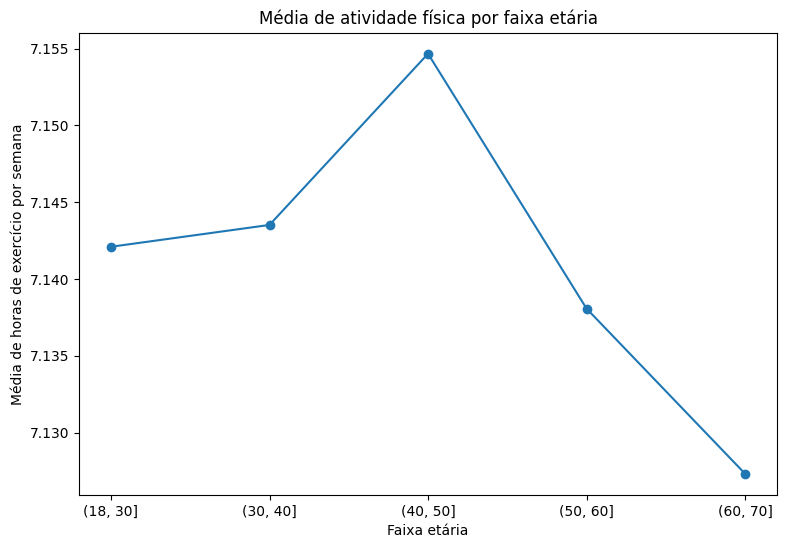

In [ ]:
df_raw['faixa_idade'] = pd.cut(
    df_raw['age'],
    bins=[18, 30, 40, 50, 60, 70, 100]
)

media = df_raw.groupby(
    'faixa_idade',
    observed=True
)['exercise_hours_per_week'].mean()

plt.figure(figsize=(9,6))
plt.plot(media.index.astype(str), media.values, marker='o')

plt.xlabel('Faixa etária')
plt.ylabel('Média de horas de exercício por semana')
plt.title('Média de atividade física por faixa etária')

plt.show()


## 3.2 Gráfico de sedentarismo em comparação ao total de usuários por faixa etária

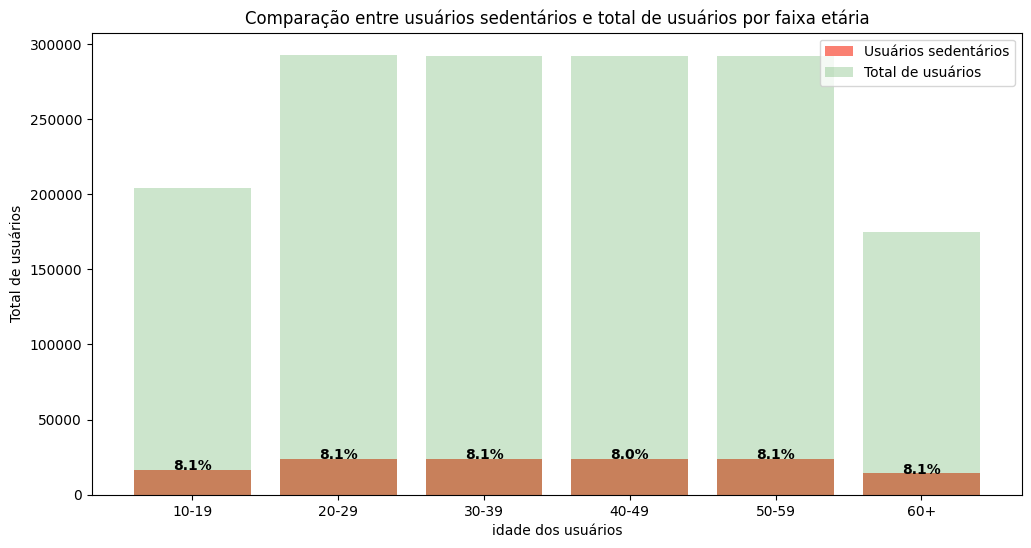

In [ ]:
binsv= [10,20,30,40,50,60,70]
labels = ['10-19','20-29','30-39','40-49','50-59','60+']

df_raw['age_group'] = pd.cut(df_raw['age'], bins=binsv, labels=labels, right=False)

plt.figure(figsize=(12,6))

df_raw['seden'] = df_raw['exercise_hours_per_week'] <= 2
df_raw['seden_total'] = df_raw[df_raw['seden'] == True]['exercise_hours_per_week']
idd_seden = df_raw.groupby('age_group',observed=True)['seden_total'].count() 
per = (idd_seden / df_raw.groupby('age_group',observed=True)['exercise_hours_per_week'].count()) * 100
plt.bar(idd_seden.index, idd_seden.values, color='salmon')
idd_total = df_raw.groupby('age_group',observed=True)['exercise_hours_per_week'].count()
plt.bar(idd_total.index, idd_total.values, color='green', alpha=0.2)
for i, valor_percentual in enumerate(per):
    plt.text(i, idd_seden.values[i] + 1, f'{valor_percentual:.1f}%', 
             ha='center', fontsize=10, fontweight='bold')
plt.xlabel("idade dos usuários") 
plt.ylabel("Total de usuários")
plt.title("Comparação entre usuários sedentários e total de usuários por faixa etária")
plt.legend(['Usuários sedentários', 'Total de usuários'])
plt.show()

## 3.3 Relação de países que mais fumam
Gráfica mostra a distribuição de fumantes por país na base de dados

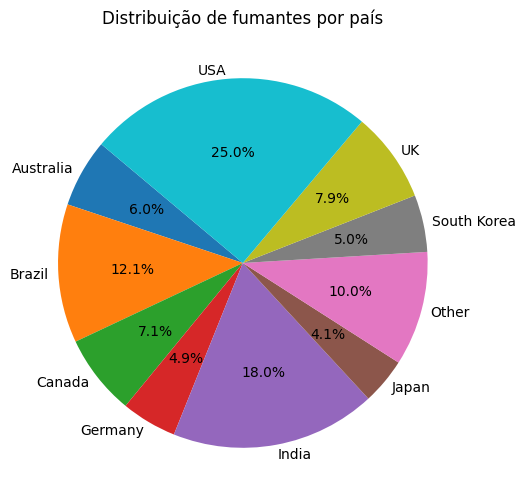

In [ ]:
df_fumantes = df_raw[df_raw['smoking'] == 'Yes']

fumantes_paises = df_fumantes.groupby('country').country.count()

plt.figure(figsize=(10, 6))
plt.pie(
    fumantes_paises,
    autopct='%1.1f%%',
    startangle=140,
    labels=fumantes_paises.index,
    labeldistance=1.05
)
plt.title('Distribuição de fumantes por país')
plt.show()



## 3.4 Fumantes por faixa etária
Gráfico abaixo mostra a quantidade de fumantes por faixa etária

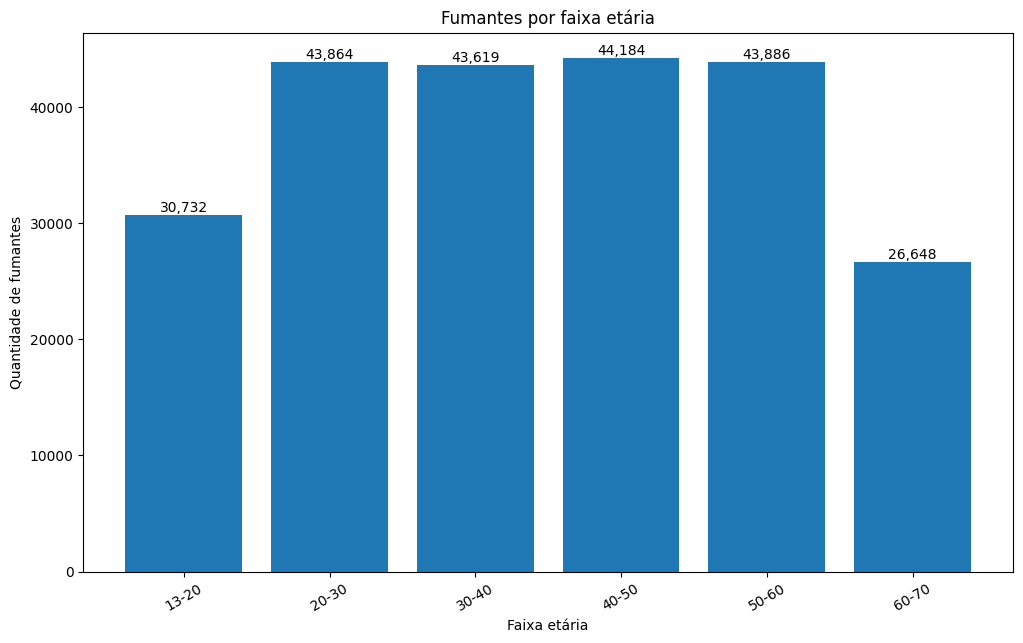

In [ ]:
bins = [13, 20, 30, 40, 50, 60, 90]
labels = ['13-20', '20-30', '30-40', '40-50', '50-60', '60-70']

df_fumantes = df_raw.loc[df_raw['smoking'].str.lower() == 'yes'].copy()

df_fumantes['faixa_etaria'] = pd.cut(
    df_fumantes['age'],
    bins=bins,
    labels=labels,
    right=False
)

fumantes_idade = df_fumantes['faixa_etaria'].value_counts().sort_index()

plt.figure(figsize=(12, 7))
bars = plt.bar(fumantes_idade.index, fumantes_idade.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,}',
        ha='center',
        va='bottom'
    )

plt.title('Fumantes por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de fumantes')
plt.xticks(rotation=30)
plt.show()



## 3.5 Verificando possíveis falhas na coleta de dados de fumantes
Essa análise mostra o número de fumantes menores que 18 anos.

In [ ]:
qtd_menores = int((df_fumantes['age'] < 18).sum())
print("A quantidade de menores que fumam é de:",qtd_menores)


A quantidade de menores que fumam é de: 21992


Foram encontrados 21992 registros de fumantes menores de 18 anos na base de dados, indicando possível erro de coleta.

## 3.6 RELAÇÃO ENTRE OS TOP 5 PAÍSES QUE MAIS FUMAM E A FAIXA ETÁRIA
Gráfico mostra a relação ente os 5 países que mais fumam e a quantidade de fumantes por idade em cada um deles.

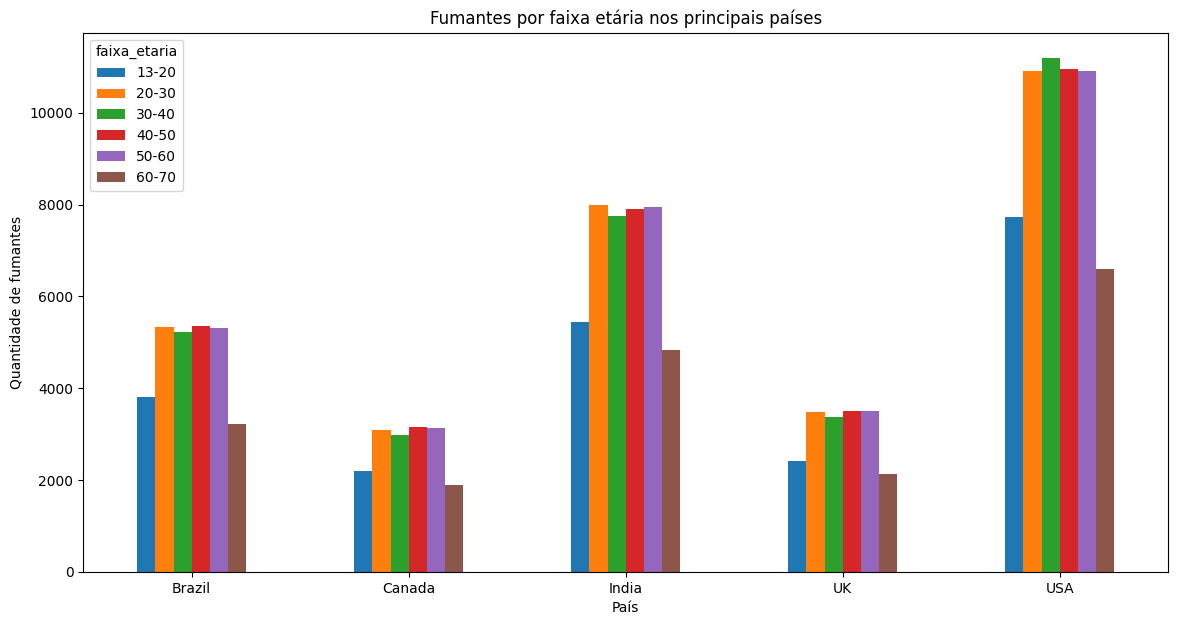

In [ ]:
df_fumantes_sem_other = df_fumantes[df_fumantes['country'] != 'Other']

top_paises = (
    df_fumantes_sem_other['country']
    .value_counts()
    .head(5)
    .index
)

df_top = df_fumantes_sem_other[
    df_fumantes_sem_other['country'].isin(top_paises)
]

tabela_top = pd.crosstab(df_top['country'], df_top['faixa_etaria'])

tabela_top.plot(kind='bar', figsize=(14, 7))
plt.title('Fumantes por faixa etária nos principais países')
plt.xlabel('País')
plt.ylabel('Quantidade de fumantes')
plt.xticks(rotation=0)
plt.show()

## 3.7 Classificação de risco dinâmico
Gráfico mostra uma matriz de correlação que tem como objetivo observar a relação de quantidade de exercício por semana com a idade e se a pessoa fuma ou não.<br>
Sendo de grande valia para gerar uma audiência qualificada para seguradoras ou planos de saúde, que podem aumentar o valor do plano, por exemplo.

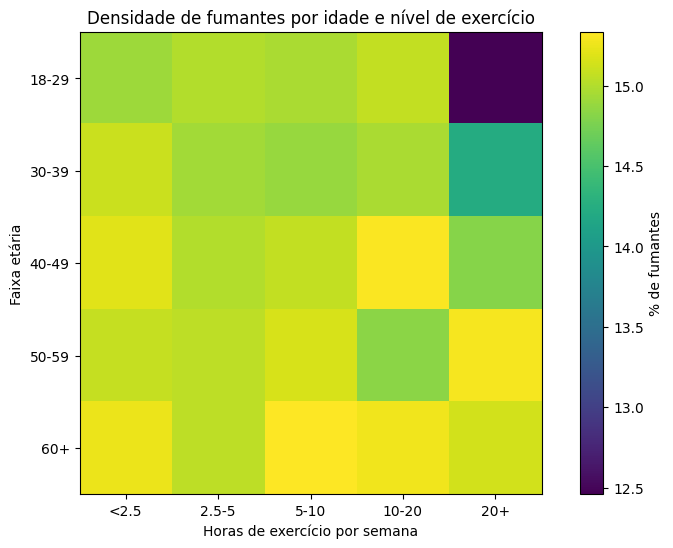

In [ ]:
bins_ex = [0, 2.5, 5, 10, 20, 100]
labels_ex = ['<2.5', '2.5-5', '5-10', '10-20', '20+']

df_raw['faixa_exercicio'] = pd.cut(
    df_raw['exercise_hours_per_week'],
    bins=bins_ex,
    labels=labels_ex,
    right=False
)

bins_age = [18, 30, 40, 50, 60, 100]
labels_age = ['18-29', '30-39', '40-49', '50-59', '60+']

df_raw['faixa_idade'] = pd.cut(
    df_raw['age'],
    bins=bins_age,
    labels=labels_age,
    right=False
)

tabela = pd.crosstab(
    df_raw['faixa_idade'],
    df_raw['faixa_exercicio'],
    values=(df_raw['smoking'].str.lower() == 'yes'),
    aggfunc='mean'
) * 100

plt.figure(figsize=(10, 6))
plt.imshow(tabela)
plt.colorbar(label='% de fumantes')
plt.xticks(range(len(tabela.columns)), tabela.columns)
plt.yticks(range(len(tabela.index)), tabela.index)
plt.title('Densidade de fumantes por idade e nível de exercício')
plt.xlabel('Horas de exercício por semana')
plt.ylabel('Faixa etária')
plt.show()

## 3.8 Gráfico de pessoas de ALTO RISCO NO MUNDO
Gráfico de grande valor para seguradoras e planos de saúde, pessoas que estão em risco elevado, ou seja, fumam e praticam menos de 5 horas de exercício por semana.<br>


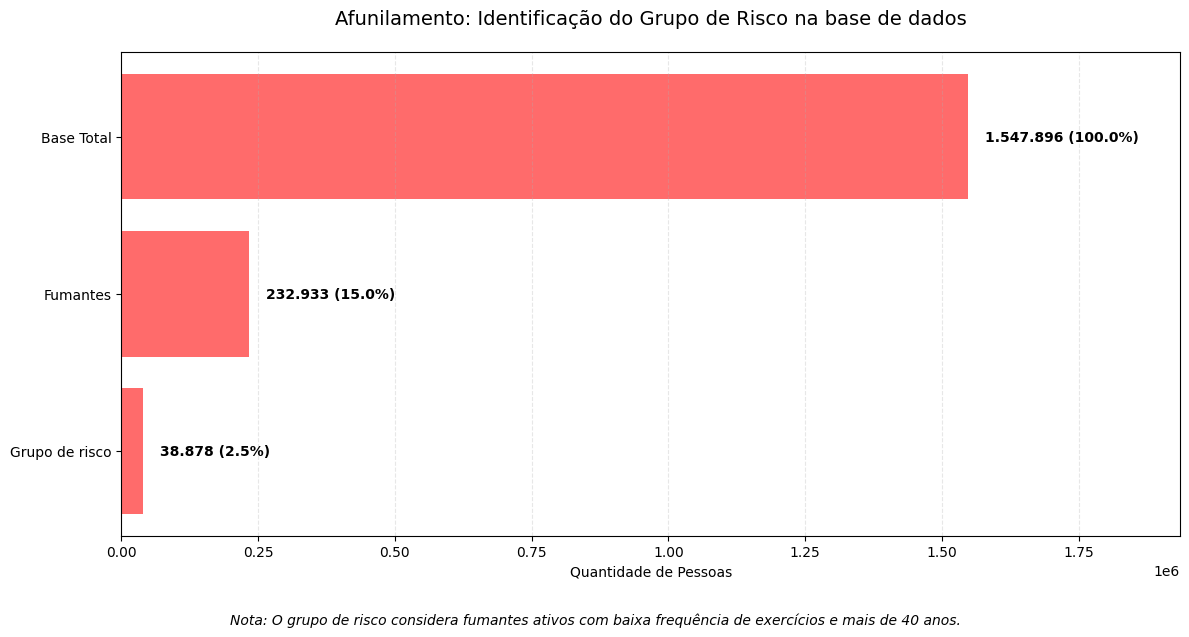

In [ ]:
total_base = len(df_raw)

df_fumantes = df_raw[df_raw['smoking'].str.lower() == 'yes']
total_fumantes = len(df_fumantes)

df_grupo_risco = df_raw[(df_raw['age'] >= 40) & (df_raw['smoking'].str.lower() == 'yes') & (df_raw['exercise_hours_per_week'] < 5)]
total_grupo_risco = len(df_grupo_risco)

etapas = ["Base Total", "Fumantes", "Grupo de risco"]
valores = [total_base, total_fumantes, total_grupo_risco]

plt.figure(figsize=(12, 6))

bars = plt.barh(etapas[::-1], valores[::-1], color='#ff6b6b') 
for index, value in enumerate(valores[::-1]):
    percentual = (value / total_base) * 100
    plt.text(value + (max(valores) * 0.02), index, 
             f"{value:,} ({percentual:.1f}%)".replace(',', '.'), 
             va='center', fontweight='bold')

plt.xlim(0, max(valores) * 1.25) # o número tava encostando na barrinha final, aumenta o limite

plt.title('Afunilamento: Identificação do Grupo de Risco na base de dados', pad=20, fontsize=14)
plt.xlabel('Quantidade de Pessoas')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.figtext(0.5, -0.05, 
            "Nota: O grupo de risco considera fumantes ativos com baixa frequência de exercícios e mais de 40 anos.", 
            ha="center", fontsize=10, style='italic')
plt.tight_layout()
plt.show()





## 3.9 Usuários com risco cardiovascular no mundo
Gráfico mostra as pessoas com risco cardiovascular no mundo, pessoas que tem 140 ou mais de pressão sitolica e 90 ou mais de diastólica ou o IMC é maior que 30.

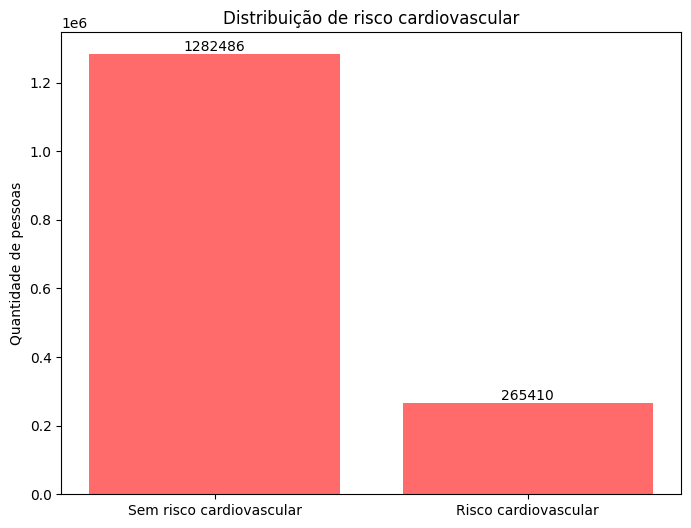

In [ ]:
df = df_raw.copy()

condicao_risco = (
    (df['blood_pressure_systolic'] >= 140) &
    (df['blood_pressure_diastolic'] >= 90) |
    (df['body_mass_index'] >= 30)
)

df['grupo_cv'] = 'Sem risco cardiovascular'
df.loc[condicao_risco, 'grupo_cv'] = 'Risco cardiovascular'

contagem = df['grupo_cv'].value_counts()

plt.figure(figsize=(8,6))
bars = plt.bar(contagem.index, contagem.values, color = '#ff6b6b')

plt.title('Distribuição de risco cardiovascular')
plt.ylabel('Quantidade de pessoas')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom'
    )

plt.show()

## 3.10 Analisando a correlação de horas trabalhadas com horas de exercicio fisico 

Text(33.51562500000001, 0.5, 'Horas de exercício por semana')

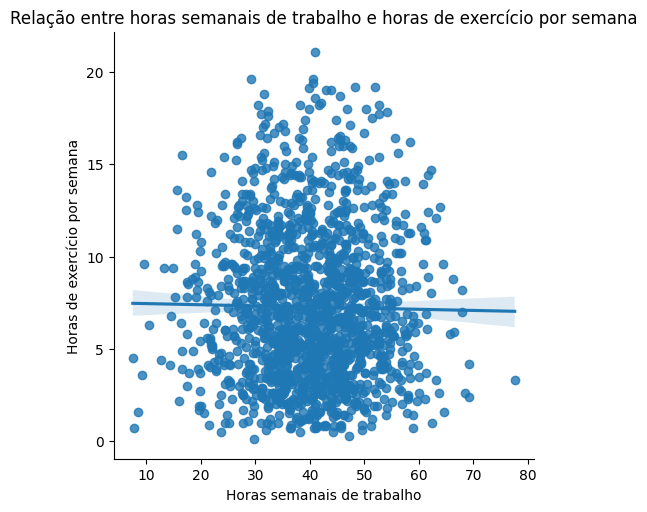

In [ ]:
df_exer_hours = df_raw.sample(1534)
sns.lmplot(x='weekly_work_hours', y='exercise_hours_per_week', data=df_exer_hours,scatter=True)
plt.title('Relação entre horas semanais de trabalho e horas de exercício por semana')
plt.xlabel('Horas semanais de trabalho')
plt.ylabel('Horas de exercício por semana')

Analisando o grafico de regreção linear acima é possivel perceber que não relação relevante entre os dois dados pois sua linha de tendencia é quase horizonta demonstrado um coneficente de relação perto de 0, os pontos estão destribuido pelo grafico de forma a ter nenhuma tendencia. Com isso pode-se concluir pouca ou nenhuma relação entre horas de exercicio fisico e horas trabalhadas.

## 3.11 Quantidade total do público esportivo na base de dados
Foi considerado público esportivo usuários que treinam 6 ou mais horas por semana e que não fumam.


In [ ]:
publico_esportivo = df_raw[
    (df_raw['exercise_hours_per_week'] >= 6) &
    (df_raw['smoking'].str.lower() == 'no') 
].copy()

print(f'Tamanho do público esportivo: {len(publico_esportivo)} pessoas')

Tamanho do público esportivo: 653215 pessoas


## 3.12 Usuários qualificados que praticam esportes e não fumam na base de dados
Aqui seria um público qualificado, para empresas interessadas em usuários com um lifestyle mais fitness, como academias e empresas que vendem materiais esportivos.<br>
A regra de negócio utilizada foi pessoas que não fumam e que praticam pelo menos 6 horas de exercício semanalmente.

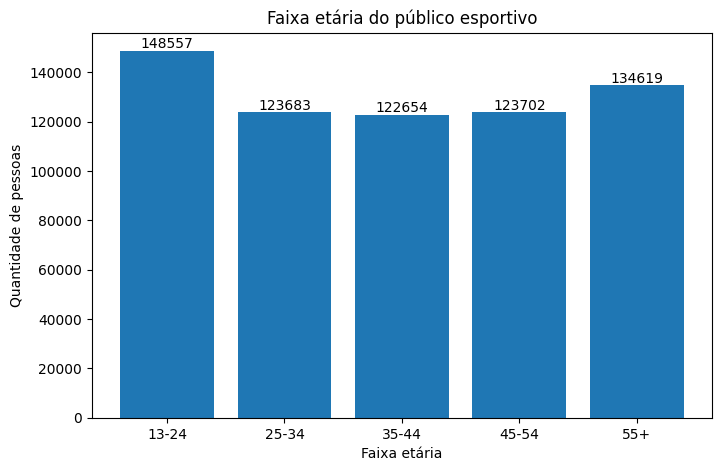

In [ ]:
publico_esportivo['faixa_idade'] = pd.cut(
    publico_esportivo['age'],
    bins=[13, 25, 35, 45, 55, 100],
    labels=['13-24', '25-34', '35-44', '45-54', '55+'],
    right=False
)

contagem = publico_esportivo['faixa_idade'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(contagem.index, contagem.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.title('Faixa etária do público esportivo')
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de pessoas')
plt.show()

## 3.13 Analisando a correlação entre faixa etária e horas de exercicio físico

Text(33.51562500000001, 0.5, 'Horas de exercício por semana')

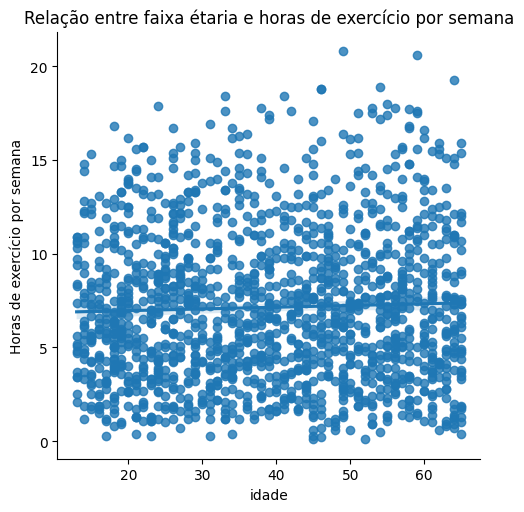

In [ ]:
df_exer_age = df_raw.sample(1534)
sns.lmplot(x='age', y='exercise_hours_per_week', data=df_exer_age,scatter=True)
plt.title('Relação entre faixa étaria e horas de exercício por semana')
plt.xlabel('idade')
plt.ylabel('Horas de exercício por semana')

É possivel perceber tambem que há pouca ou nenhuma relação entre as duas colunas